In [38]:
import pickle
import numpy as np
from random import shuffle
import requests
import math
from datetime import datetime
import operator
from sklearn import datasets, linear_model, svm, manifold
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties
import pylab

In [2]:
f = open('../Results/Pickles/member_names.pickle', 'rb')
member_names = pickle.load(f)
f.close()

In [3]:
f = open('../Results/Pickles/edge_details.pickle', 'rb')
edge_details = pickle.load(f)
f.close()

In [24]:
f = open('../Data/parties.csv', 'r')

parties = f.readlines()
parties = [p.strip() for p in parties]

f.close()

In [27]:
f = open('../Results/Pickles/member_details.pickle', 'rb')
member_details = pickle.load(f)
f.close()

In [52]:
f = open('../Results/Pickles/debate_details.pickle', 'rb')
debate_details = pickle.load(f)
f.close()

In [60]:
alliances = ['UPA', 'NDA', 'TF', 'Others']

party_alliance = {'INC':'UPA', 'DMK':'Others', 'J&KNC':'UPA', 'CPI(M)':'TF', 'SS':'NDA', 'AITC':'UPA', 'BJP':'NDA',\
                  'IUML':'UPA', 'AIUDF':'Others', 'SAD':'NDA', 'AIADMK':'TF', 'SP':'Others', 'RLD':'UPA', 'JMM':'NDA',\
                  'BSP':'TF', 'HJC':'NDA', 'NCP':'UPA', 'BPF':'NDA', 'NPF':'UPA', 'JD(U)':'Others', 'CPI':'TF',\
                  'JD(S)':'TF', 'MDMK':'TF', 'BVA':'Others', 'BJD':'TF', 'Ind.':'Others', 'JVM (P)':'Others',\
                  'RJD':'Others', 'AIFB':'TF', 'RSP':'TF', 'KC(M)':'UPA', 'TDP':'TF', 'AIMIM':'Others', 'SDF':'NDA',\
                  'TRS':'NDA', 'YSR Congress Party':'Others', 'SWP':'Others', 'VCK':'Others', 'AGP':'NDA'}


# Features : Number of times member participated in debate

In [53]:
individual_interaction = {}

for debate in debate_details:
    for rec in debate_details[debate]:
        for participant in rec[0]:
            participant = participant.split()
            if 'Shri' in participant:
                participant.remove('Shri')
            if 'Dr.' in participant:
                participant.remove('Dr.')
            if 'Smt.' in participant:
                participant.remove('Smt.')
            participant = ' '.join(participant)
            if participant in individual_interaction:
                individual_interaction[participant] += 1
            else:
                individual_interaction[participant] = 1

In [55]:
data = []

for i in range(len(member_names)):
    if member_names[i] in individual_interaction:
        data.append(individual_interaction[member_names[i]])
    else:
        data.append(0)

In [56]:
model = manifold.TSNE()
coordinates = model.fit_transform(np.array(data).reshape(-1, 1))

In [57]:
colors = ['#8b8378', '#cdb79e', '#ff4500', '#2f4f4f', '#191970', '#6495ed', '#7b68ee', '#00ffff', '#66cdaa', '#7fffd4', '#006400', '#556b2f', '#00ff7f', '#f0e68c', '#bdb76b', '#ffff00', '#daa520', '#b8860b', '#bc8f8f', '#f4a460', '#d2691e', '#b22222', '#4682b4', '#ff0000', '#ff1493', '#db7093', '#d02090', '#9932cc', '#d8bfd8', '#bebebe', '#0000ff', '#ff8c00', '#ffd700', '#e9967a', '#ffdead', '#ffffbb','#ee8f8f', '#0b5670', '#fa8072']

member_colors = []

for i in range(len(member_names)):
    member_colors.append(colors[parties.index(member_details[member_names[i]][0])])

In [58]:
legend_list = []

for i in range(len(parties)):
    legend_list.append(mpatches.Patch(color = member_colors[i], label = parties[i]))
    
fontp = FontProperties()
fontp.set_size('small')

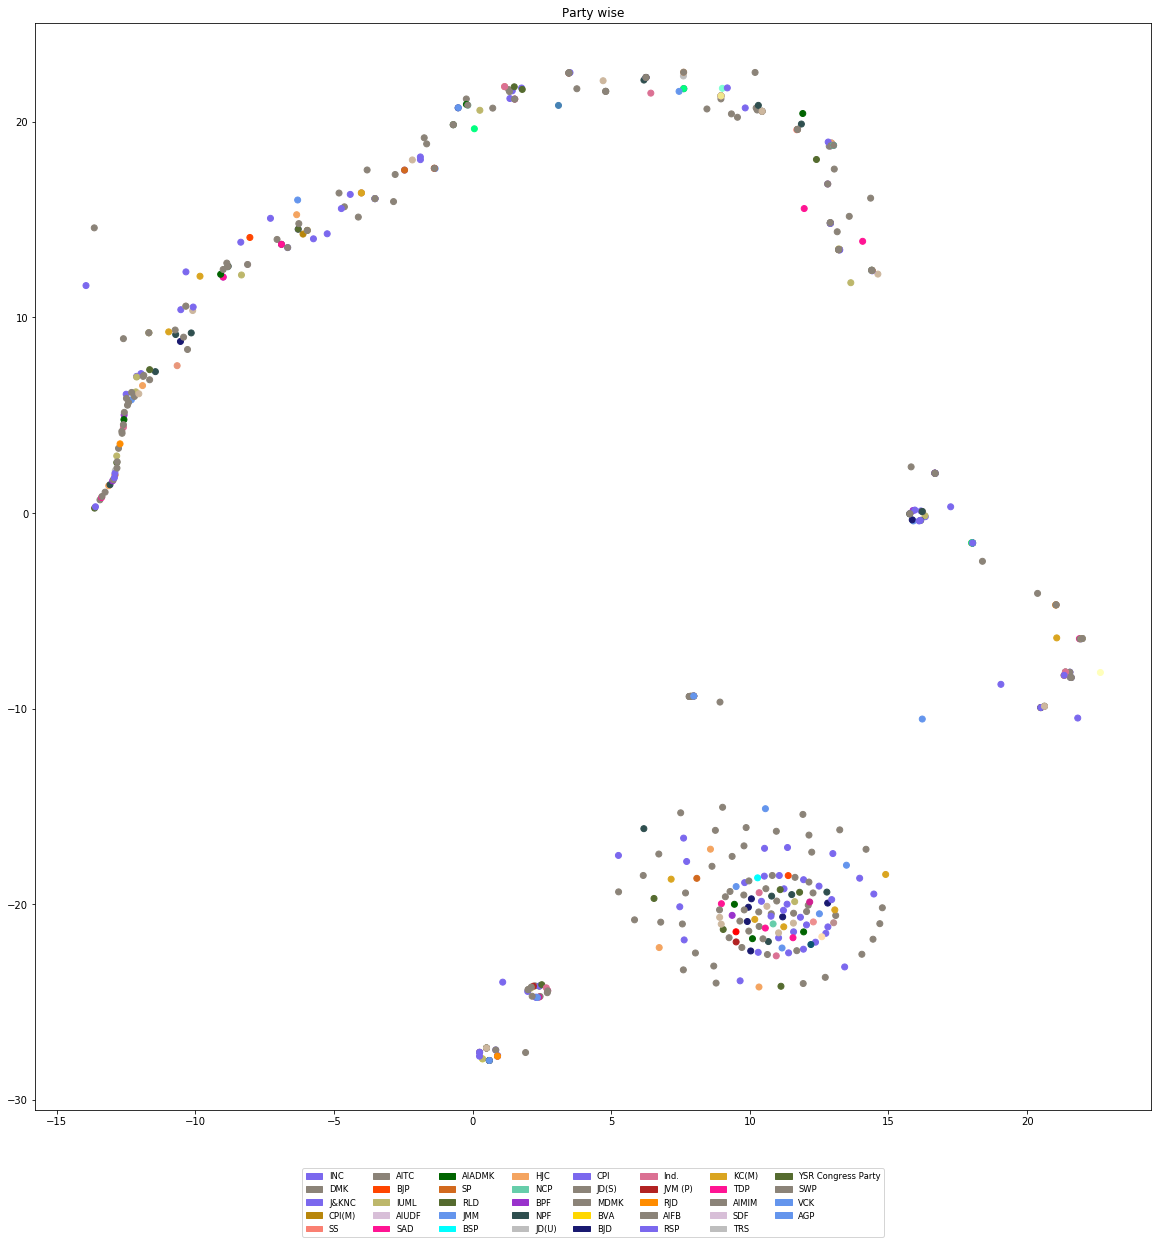

In [59]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('small')

plt.scatter([x[0] for x in coordinates], [x[1] for x in coordinates], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Party wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

## Organizing by alliance

In [61]:
color_map = {'UPA':'red', 'NDA':'blue', 'TF':'green', 'Others':'black'}

member_colors = []

for i in range(len(member_names)):
    member_colors.append(color_map[party_alliance[member_details[member_names[i]][0]]])

In [63]:
legend_list = []

for rec in color_map:
    legend_list.append(mpatches.Patch(color = color_map[rec], label = rec))
    
fontp = FontProperties()
fontp.set_size('small')

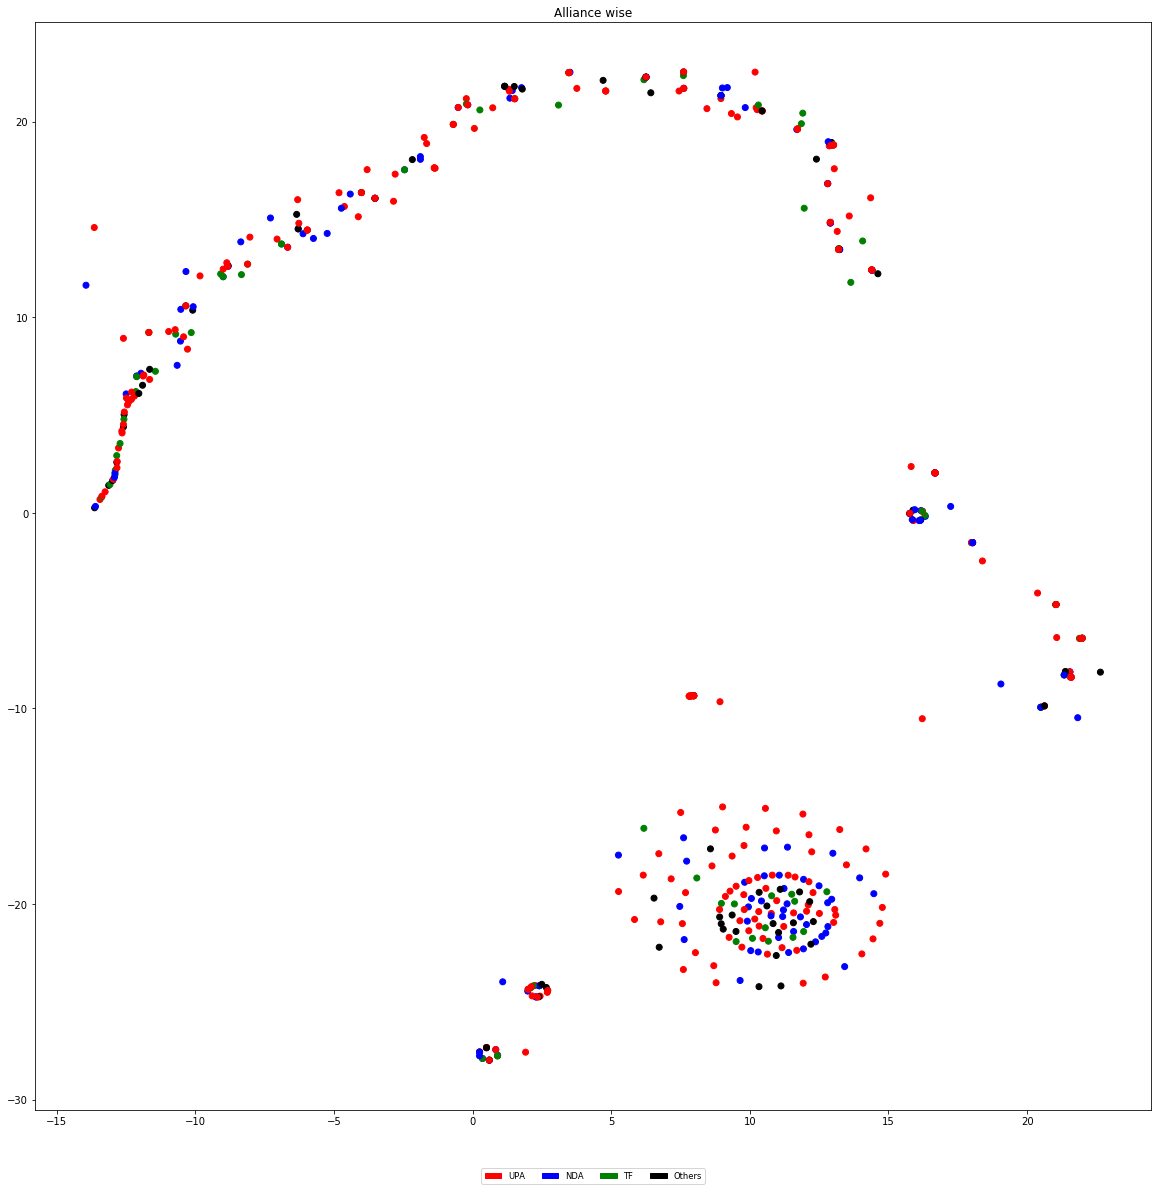

In [64]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('small')

plt.scatter([x[0] for x in coordinates], [x[1] for x in coordinates], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Alliance wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

# Features: Number of times member participated + Number of types of debates member participated in